In [40]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from operator import add

In [41]:
class BatsmanState(TypedDict):
    runs:Annotated[int, add]
    balls:int
    fours:int
    sixes:int

    sr:float
    bpd:float  # balls per dismissal       
    boundary_percentage:float
    summary:str

    

In [52]:

def calculate_sr(state: BatsmanState):
    return {
        "strike_rate": (state["runs"] / state["balls"]) / 100
    }




In [62]:
def calculate_bpd(state:BatsmanState):
    bpd=state['bpd']=state['balls']/(state['fours']+state['sixes'])
      # assuming 30 runs per dismissal
    state['bpd']=bpd
    
    return state

In [61]:
def calculate_boundary_percentage(state: BatsmanState):
    boundary_runs = state["fours"] * 4 + state["sixes"] * 6
    return {
        "boundary_percentage": (boundary_runs / state["runs"]) * 100
    }

In [ ]:
def summary(state:BatsmanState):
    print("Strike Rate:",state['sr'])
    print("Balls per Dismissal:",state['bpd'])
    print("Boundary Percentage:",state['boundary_percentage'])
    return state

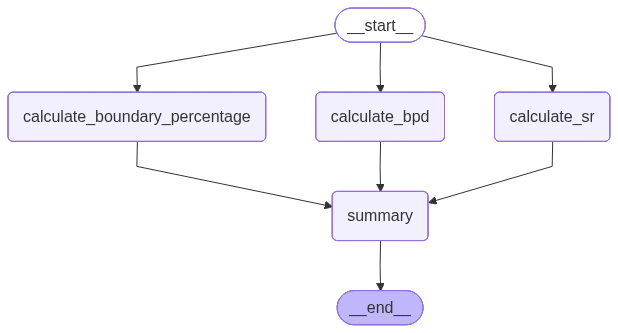

In [54]:
graph=StateGraph(BatsmanState)

graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpd',calculate_bpd)  
graph.add_node('calculate_boundary_percentage',calculate_boundary_percentage)
graph.add_node('summary',summary)


#definig the edges
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpd')
graph.add_edge(START,'calculate_boundary_percentage')


graph.add_edge('calculate_sr','summary')   

graph.add_edge('calculate_bpd','summary')  
graph.add_edge('calculate_boundary_percentage','summary') 

graph.add_edge('summary',END)

graph.compile()
